# Exercise 2
## 2 - Regularized Logistic Regression

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'passed'])
dataset.head()

,test1,test2,passed
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Visualizing the data

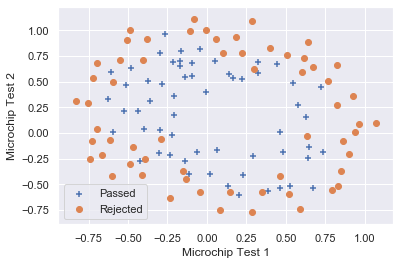

In [62]:
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,2]

pos = y==1
neg = y==0
sns.set()
plt.scatter(X[pos]['test1'], X[pos]['test2'], marker='+')
plt.scatter(X[neg]['test1'], X[neg]['test2'])
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Passed', 'Rejected'])
plt.show()

### Feature Mapping

In [ ]:
def mapFeature(X1, X2, degree):
    m = len(X1)
    out = np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            feature = (X1**(i-j))*(X2**j)
            out = np.hstack((out, feature[:,np.newaxis]))
    return out

In [52]:
X_mapped = mapFeature(X.iloc[:,0], X.iloc[:,1], 6)
print(X_mapped.shape)
y = y[:,np.newaxis]

(118, 28)


In [53]:
m, n = X_mapped.shape
ones = np.ones((m,1))
theta = np.zeros((n,1))
print(theta.shape)

(28, 1)


### Cost function and gradient

In [54]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [55]:
def costFunctionReg(theta, X, y, lmbd):
    m = len(y)
    z = np.dot(X, theta)
    term1 = -y*np.log(sigmoid(z))
    term2 = (1-y)*np.log(1-sigmoid(z))
    J = (1/m)*np.sum(term1 - term2) + lmbd/(2*m)*np.sum(theta**2)
    return J

In [56]:
def grad(theta, X, y, lmbd):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    grad = (1/m)*np.dot(X.T, h-y)
    return grad + (lmbd/m)*theta

In [57]:
J = costFunctionReg(theta, X_mapped, y, lmbd=1)
print(J)

0.6931471805599454


### Learning parameters using `gradientDescent`

In [58]:
def gradientDescent(X, y, theta_initial, alpha, iterations, lmbd):
    m = len(y)
    theta = theta_initial.copy()
    J_val = []
    for i in range(iterations):
        grad2 = grad(theta, X, y, lmbd)
        cost = costFunctionReg(theta, X, y, lmbd)
        theta -= alpha*grad2
        J_val.append(cost)
    return theta, J_val

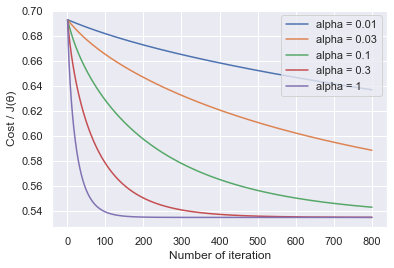

In [59]:
iterations = 800
alpha = [0.01, 0.03, 0.1, 0.3, 1]
theta_optimized1 = 0
for i in alpha:
    theta_optimized1, J_value =  gradientDescent(X_mapped, y, theta, alpha=i, iterations=iterations, lmbd=1)
    plt.plot(np.arange(1,iterations+1), J_value, label='alpha = '+str(i))
plt.xlabel('Number of iteration')
plt.ylabel('Cost / J(θ)')
plt.legend()
plt.show()

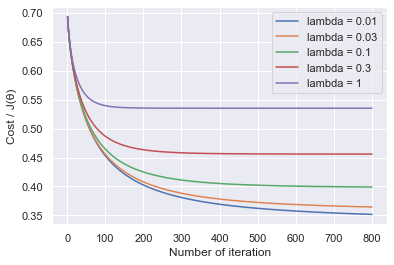

In [61]:
lmbd = [0.01, 0.03, 0.1, 0.3, 1]
theta_optimized1 = 0
iterations = 800
for i in lmbd:
    theta_optimized1, J_value =  gradientDescent(X_mapped, y, theta, alpha=1, iterations=iterations, lmbd=i)
    plt.plot(np.arange(1,iterations+1), J_value, label='lambda = '+str(i))
plt.xlabel('Number of iteration')
plt.ylabel('Cost / J(θ)')
plt.legend()
plt.show()


In [63]:
# from the figure above, alpha = 1 and lambda = 0.03 are chosen

theta_optimized1, J_value =  gradientDescent(X_mapped, y, theta, alpha=1, iterations=iterations, lmbd=0.03)

plt.plot(np.arange(1,iterations+1), J_value)
plt.xlabel('Number of iteration')
plt.ylabel('Cost / J(θ)')
plt.show()

J_optimized1 = costFunctionReg(theta_optimized1, X_mapped, y, lmbd=0.03)
print(J_optimized1)

Exception: Data must be 1-dimensional

In [65]:
pos = y[:,0] ==1
neg = y[:,0] ==0

plt.scatter(X_mapped[:,1][pos], X_mapped[:,2][pos], marker='+', label='Passed')
plt.scatter(X_mapped[:,1][neg], X_mapped[:,2][neg], label='Rejected')

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6), theta_optimized1)

plt.contour(u_vals,v_vals,z.T,0, colors='b')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc=0)
plt.show()

ValueError: Can only tuple-index with a MultiIndex

In [18]:
print(theta_optimized1.shape)
print(theta_optimized1)

(28, 1)
[[ 2.88376159]
 [ 2.01635339]
 [ 3.1447908 ]
 [-4.53697201]
 [-3.46107366]
 [-4.18974847]
 [ 0.8325578 ]
 [-1.30250837]
 [-0.92895367]
 [-0.26479028]
 [-3.62504455]
 [ 0.12248601]
 [-1.86574955]
 [-1.25335514]
 [-2.9876157 ]
 [-0.5149059 ]
 [-0.63279355]
 [ 0.23543865]
 [-1.04508708]
 [-1.21847258]
 [-0.41347793]
 [-2.8051984 ]
 [ 0.25906543]
 [-0.84292041]
 [ 0.19344531]
 [-1.08215325]
 [-0.87335077]
 [-1.69817706]]


### Learning parameters using `minimize`

In [22]:
from scipy.optimize import minimize
lmbd = 0.03
temp = minimize(fun = costFunctionReg, 
                    x0 = theta.flatten(),jac = grad, 
                    args = (X_mapped, y.flatten(), lmbd), 
                    method='Newton-CG')
theta_optimized2 = temp.x
print(f'Optimized theta from fmin: {theta_optimized2}')

Optimized theta from fmin: [ 3.34960826  2.10078282  3.87513858 -4.85123528 -5.07625306 -5.5542378
  1.34817499 -1.03027086  0.51258718 -1.28210172 -3.96643028  1.68930274
 -2.67054606 -1.79001407 -4.04111566 -1.08955376 -0.51444826  2.19203955
 -2.18472586 -2.28842945  0.9491349  -3.88924563  0.82530766 -0.9062594
  1.36489762 -2.31755864 -1.97799804 -0.54110719]


In [23]:
J_optimized2 = costFunctionReg(theta_optimized2.reshape(len(theta_optimized2),1), X_mapped, y, lmbd=0.03)
print(J_optimized2)

0.3561755827411081


### Plotting the decision boundary

In [16]:
def mapFeaturePlot(X1, X2, degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            feature = (X1**(i-j) * X2**j)
            out = np.hstack((out,feature))
    return out

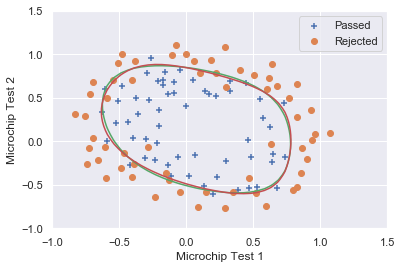

In [24]:
pos = y[:,0] ==1
neg = y[:,0] ==0

plt.scatter(X_mapped[:,1][pos], X_mapped[:,2][pos], marker='+', label='Passed')
plt.scatter(X_mapped[:,1][neg], X_mapped[:,2][neg], label='Rejected')

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z1=np.zeros((len(u_vals),len(v_vals)))
z2=np.zeros((len(u_vals),len(v_vals)))

for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z1[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6), theta_optimized1)


for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z2[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6), theta_optimized2.reshape(len(theta_optimized2),1))

plt.contour(u_vals,v_vals,z1.T,0, colors='g', label='gradientDescent')
plt.contour(u_vals,v_vals,z2.T,0, colors='r', label='minimize')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

In [34]:
pred1 = [sigmoid(np.dot(X_mapped, theta_optimized1.flatten())) >= 0.5]
print(f'Train accuracy using gradientDescent: {np.mean(pred1 == y.flatten()) * 100:.4f}%')
pred2 = [sigmoid(np.dot(X_mapped, theta_optimized2)) >= 0.5]
print(f'Train accuracy using minimize: {np.mean(pred2 == y.flatten()) * 100:.4f}%')

Train accuracy using gradientDescent: 83.8983%
Train accuracy using minimize: 84.7458%


In [26]:
lmbd = 0
temp = minimize(fun = costFunctionReg, 
                    x0 = theta.flatten(),jac = grad, 
                    args = (X_mapped, y.flatten(), lmbd), 
                    method='Newton-CG')
theta_optimized3 = temp.x
print(f'Optimized theta from fmin: {theta_optimized3}')

Optimized theta from fmin: [   7.88008863    6.13117537    5.9061983   -71.42859283  -29.21764295
  -24.88917936  -47.00671311  -19.78824795    4.62607507   -5.45882493
  238.59412388  138.99556397  229.41483321   76.3536225    26.28809042
   88.02807019   63.46269005   50.32843137    6.1141907    -6.8986286
   15.35708584 -270.25450836 -222.37398824 -328.93614186 -124.89494133
 -266.45452993 -113.07033298  -32.20721339]


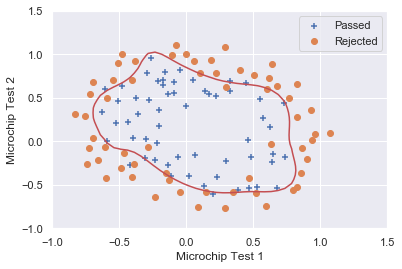

In [27]:
pos = y[:,0] ==1
neg = y[:,0] ==0

plt.scatter(X_mapped[:,1][pos], X_mapped[:,2][pos], marker='+', label='Passed')
plt.scatter(X_mapped[:,1][neg], X_mapped[:,2][neg], label='Rejected')

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z1=np.zeros((len(u_vals),len(v_vals)))
z2=np.zeros((len(u_vals),len(v_vals)))


for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z2[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6), theta_optimized3.reshape(len(theta_optimized3),1))


plt.contour(u_vals,v_vals,z2.T,0, colors='r')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

In [32]:
lmbd = 10
temp = minimize(fun = costFunctionReg, 
                    x0 = theta.flatten(),jac = grad, 
                    args = (X_mapped, y.flatten(), lmbd), 
                    method='Newton-CG')
theta_optimized4 = temp.x
print(f'Optimized theta from fmin: {theta_optimized4}')

Optimized theta from fmin: [ 0.21471383 -0.00759413  0.17609637 -0.40128051 -0.11744863 -0.23187705
 -0.06667988 -0.05584263 -0.06214436 -0.09712322 -0.31766634 -0.01468069
 -0.1091292  -0.03014286 -0.26765333 -0.11186995 -0.0362743  -0.02114484
 -0.0475365  -0.04037683 -0.18120251 -0.24308853 -0.00364213 -0.05525125
 -0.00101448 -0.06093906 -0.01293856 -0.26289816]


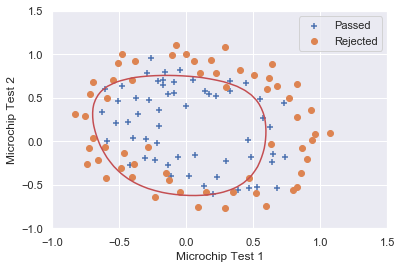

In [33]:
pos = y[:,0] ==1
neg = y[:,0] ==0

plt.scatter(X_mapped[:,1][pos], X_mapped[:,2][pos], marker='+', label='Passed')
plt.scatter(X_mapped[:,1][neg], X_mapped[:,2][neg], label='Rejected')

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z1=np.zeros((len(u_vals),len(v_vals)))
z2=np.zeros((len(u_vals),len(v_vals)))


for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z2[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6), theta_optimized4.reshape(len(theta_optimized4),1))


plt.contour(u_vals,v_vals,z2.T,0, colors='r')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()